# Heart Disease Prediction Using ML Classification Methods as well as Regression Methods.    

**Age:** Age of the patient (years)

**Sex:** Sex of the patient

**ChestPainType:** Chest Pain type

 1. TA  = Typical Angina

 2. ATA = Atypical Angina

 3. NAP = Non-Anginal Pain

 4. ASY = Asymptomatic

**RestingBP:** Resting blood pressure [mm Hg]

**Cholesterol:** Serum cholesterol [mm/dl]

**FastingBS:** (fasting blood sugar > 120 mg/dl)

 1. 1 = true

 2. 0 = false
 
**RestingECG:** resting electrocardiogram results

1. Normal: normal

2. ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

3. LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria

**MaxHR:** maximum heart rate achieved [Numeric value between 60 and 202]

**ExerciseAngina:** exercise-induced angina

1. Y: Yes
2. N: No

**Oldpeak:** oldpeak = ST [Numeric value measured in depression]

**ST_Slope:** the slope of the peak exercise ST segment
1. Up: upsloping
2. Flat: flat
3. Down: Downsloping

**HeartDisease:** output class
1. 1: heart disease
2. 0: Normal



**We will be keeping all the attributes as they all seem useful for making predictions and improving the modeling accuracy. Each of the attributes are unique and no attributes has all the same value for all rows.**

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/kaggle/input/heartds/heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,52,M,ASY,160,197,0,ST,82,Y,-2.6,Flat,1
1,52,M,ASY,160,197,0,Normal,94,Y,-2.6,Flat,1
2,53,M,ATA,120,197,0,Normal,95,N,-2.6,Flat,1
3,52,M,ASY,130,198,0,Normal,110,Y,-2.6,Flat,1
4,52,M,NAP,122,198,0,Normal,110,Y,-2.6,Down,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1136,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1
1137,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
1138,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
1139,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1


In [3]:
# That can show that we don't have ayn missing data in the dataset.
df.isnull().sum().sort_values(ascending=False)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# Part 3 – Handling missing data and outliers [Point 1]

Injecting some NaN values 

In [4]:
# putting 15% of the HeartDisease column data as NaN. 
df.loc[df.sample(frac=0.15).index , "HeartDisease"] = np.NaN

# putting 15% of the FastingBS column data as NaN. 
df.loc[df.sample(frac=0.15).index , "FastingBS"] = np.NaN

dfCopy = df.copy() # Cashing a copy for future use
print("The percentage of missing data in HeartDisease column is: " , ((df["HeartDisease"].isnull().sum() / df.shape[0])*100).round(1) ,"%")
print("The percentage of missing data in FastingBS column is: " , ((df["FastingBS"].isnull().sum() / df.shape[0])*100).round(1),"%")

df.isnull().sum().sort_values(ascending=False)

The percentage of missing data in HeartDisease column is:  15.0 %
The percentage of missing data in FastingBS column is:  15.0 %


FastingBS         171
HeartDisease      171
Age                 0
Sex                 0
ChestPainType       0
RestingBP           0
Cholesterol         0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
dtype: int64

In [5]:
# Getting the mode of the HeartDisease and FastingBS columns. 
HeartDisease_col_mode = df["HeartDisease"].mode().values[0].tolist()
FastingBS_col_mode = df["FastingBS"].mode().values[0].tolist()
print("The mode of the HeartDisease column is: ", round(HeartDisease_col_mode,2))
print("The mode of the FastingBS column is: ", round(FastingBS_col_mode, 2))

The mode of the HeartDisease column is:  1.0
The mode of the FastingBS column is:  0.0


In [6]:
# We are replacing the missing values with the mode of each of the two columns that has missing data.
df.loc[df["HeartDisease"].isnull() == True, "HeartDisease"] = HeartDisease_col_mode
df.loc[df["FastingBS"].isnull() == True, "FastingBS"] = FastingBS_col_mode

In [7]:
# Now we don't have any row that has any missing values. 
df.isnull().sum().sort_values(ascending=False)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
# I'm checking in this cell that the percentage of the outliers in RestingBP and Oldpeak columns is between (3% - 5%).
def get_outliers_sum(columns):
    for col in columns:
        sorted_col = df[col].sort_values(ascending=True)
        quartile_1 = np.percentile(sorted_col, 25)
        quartile_3 = np.percentile(sorted_col, 75)
        IQR = quartile_3 - quartile_1
        lower_bound  = quartile_1 - (1.5*IQR)
        upper_bound  = quartile_3 + (1.5*IQR)
        
        outlier_sum = 0
        for i in range(len(sorted_col)):
            if((sorted_col[i] < lower_bound) | (sorted_col[i] > upper_bound)):
                outlier_sum = outlier_sum + 1
                
        print("The percentage of ouliers in", col  , "column is:" , round(((outlier_sum / sorted_col.shape[0])*100), 2) ,"%")
    

val_cols_names = ['RestingBP', 'Oldpeak']

get_outliers_sum(val_cols_names)

The percentage of ouliers in RestingBP column is: 3.33 %
The percentage of ouliers in Oldpeak column is: 3.86 %


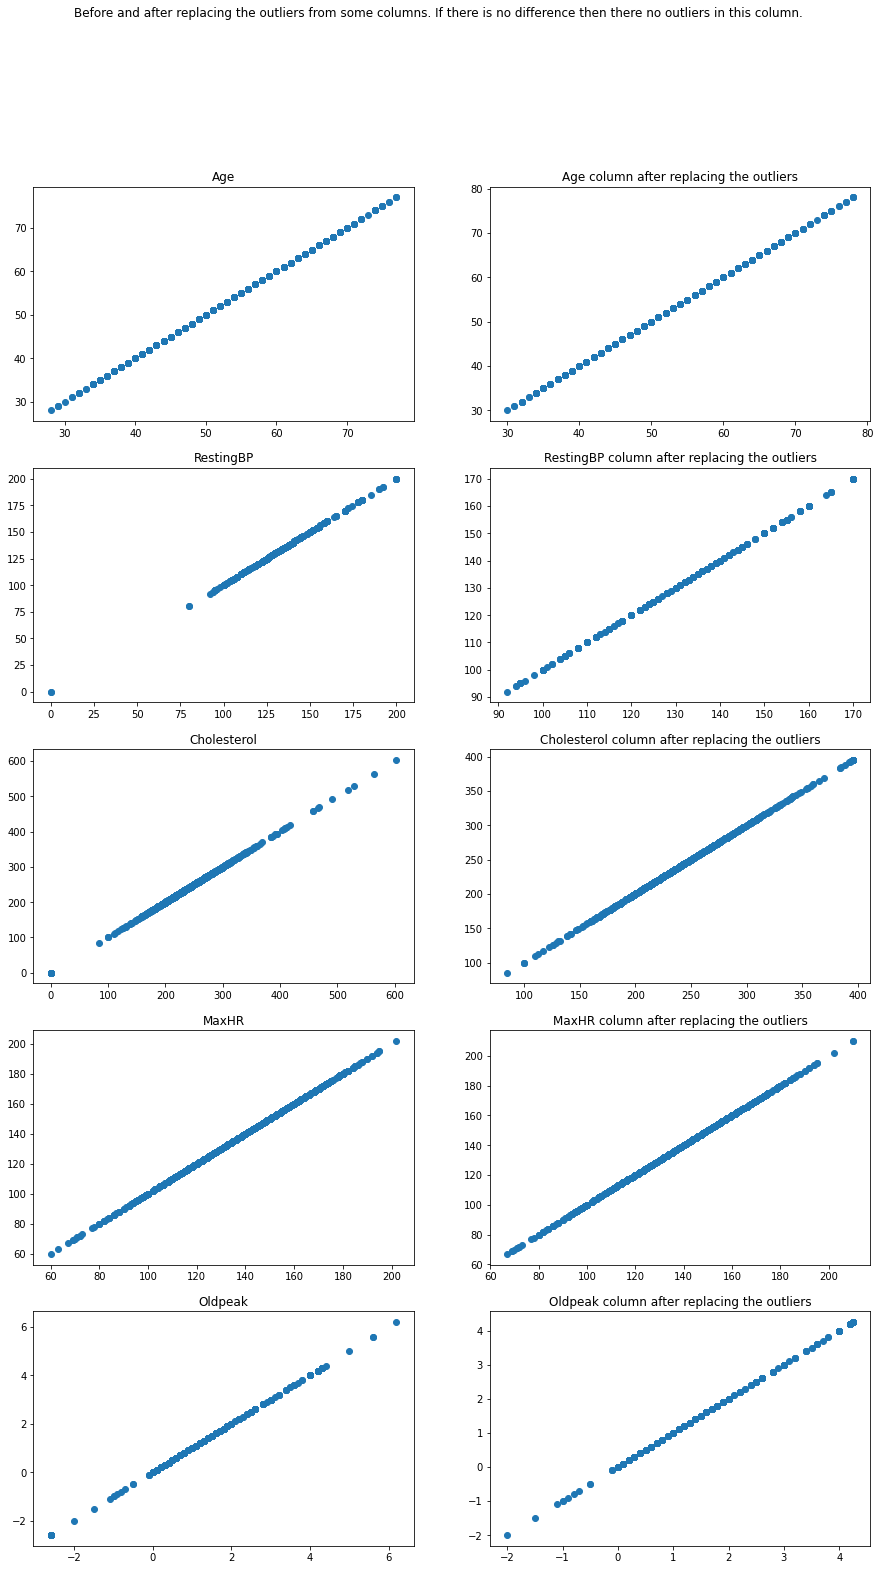

In [9]:
def replacing_outliers(columns, df):
    fig, axs = plt.subplots(len(columns),2,figsize=(15, 25))
    fig.suptitle("Before and after replacing the outliers from some columns. If there is no difference then there no outliers in this column.")
    axs=axs.flatten()
    # These two variables are for tracking the places to plot the old and new columns.
    l = 0
    r = 1
    # In this for loop I'm replacing all the outliers from the columns specified in the columns array, Also 
    # I'm plotting each column before and after replacing the outliers. 
    for col in columns:
        sorted_col = df[col].sort_values(ascending=True)
        quartile_1 = np.percentile(sorted_col, 25)
        quartile_3 = np.percentile(sorted_col, 75)
        IQR = quartile_3 - quartile_1
        lower_bound  = quartile_1 - (1.5*IQR)
        upper_bound  = quartile_3 + (1.5*IQR)
        
        ouliers_indexes = sorted_col[ (sorted_col[sorted_col.index] < lower_bound) | (sorted_col[sorted_col.index] > upper_bound) ].index

        axs[l].scatter(df[col], df[col])
        axs[l].set_title(col)
        
        df.loc[(df[col] < lower_bound) | (df[col] > upper_bound), col] = upper_bound
    
        axs[r].scatter(df[col] , df[col])
        axs[r].set_title(col + " column after replacing the outliers")
        l = l + 2
        r = r + 2
        
    return df
        
val_cols_names = ['Age','RestingBP','Cholesterol','MaxHR', 'Oldpeak']

df = replacing_outliers(val_cols_names, df)
    

In [10]:
# That can show that the data type of all the columns is correct.
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol       float64
FastingBS         float64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease      float64
dtype: object

In [11]:
# In this cell I'm cleaning some columns that should get some specific values, I'm checking if these columns 
# have any other values than specified above and removing them if there are any, and these columns are
# ChestPainType, FastingBS, RestingECG, ExerciseAngina, ST_Slope

# Because we know that the Chest Pain types are either "TA" or "ATA" or "NAP"
# or "ASY", it makes sense to consider anything else as wrong type and remove it.
notTA = df["ChestPainType"] != "TA"
notATA = df["ChestPainType"] != "ATA"
notNAP = df["ChestPainType"] != "NAP"
notA = df["ChestPainType"] != "ASY"
df = df.drop(df[notTA & notATA & notNAP & notA].index)

# Because we know that the fasting blood sugar (FastingBS) values are either 1 which represents True or
# 0 which represents False, it makes sense to consider anything else as wrong value and remove it.
notZero = df["FastingBS"] != 0
notOne = df["FastingBS"] != 1
df = df.drop(df[notOne & notZero].index)

# Because we know that the resting electrocardiographic results (RestingECG) values are either "Normal" or
# "ST" or "LVH", it makes sense to consider anything else as wrong value and remove it.
notNormal = df["RestingECG"] != "Normal"
notST = df["RestingECG"] != "ST"
notLVH = df["RestingECG"] != "LVH"
df = df.drop(df[notNormal & notST & notLVH].index)

# Because we know that the exercise-induced angina (ExerciseAngina) values are either Y which represents Yes or
# N which represents No, it makes sense to consider anything else as wrong value and remove it.
notNo = df["ExerciseAngina"] != "N"
notYes = df["ExerciseAngina"] != "Y"
df = df.drop(df[notNo & notYes].index)

# Because we know that the slope of the peak exercise ST segment (ST_Slope) values are either Up which represents upsloping or
# Flat which represents flat or Down which reptesents Downsloping, it makes sense to consider anything else
# as wrong value and remove it.
notFlat = df["ST_Slope"] != "Flat"
notUp = df["ST_Slope"] != "Up"
notDown = df["ST_Slope"] != "Down"
df = df.drop(df[notFlat & notUp & notDown].index)

dfCopyForPlotting = df.copy()

# Feature Engineering 

In [12]:
from sklearn.preprocessing import OneHotEncoder 
ohe = OneHotEncoder()

# Encoding the sex feature using one-hot encoding. Then I added the two generated columns in the dataframe. 
sex_trans = pd.DataFrame(ohe.fit_transform(df.Sex.values.reshape(-1,1)).toarray())
df.insert(1, ohe.categories_[0][0], sex_trans[0].astype(int), True )
df.insert(2, ohe.categories_[0][1], sex_trans[1].astype(int), True )

# Encoding the Chest Pain Type feature using one-hot encoding. Then I added the four generated columns in the dataframe. 
cp_trans = pd.DataFrame(ohe.fit_transform(df.ChestPainType.values.reshape(-1,1)).toarray())
df.insert(3, ohe.categories_[0][0], cp_trans[0].astype(int), True )
df.insert(4, ohe.categories_[0][1], cp_trans[1].astype(int), True )
df.insert(5, ohe.categories_[0][2], cp_trans[2].astype(int), True )
df.insert(6, ohe.categories_[0][3], cp_trans[3].astype(int), True )

# Encoding the RestingECG feature using one-hot encoding. Then I added the four generated columns in the dataframe. 
RestingECG_trans = pd.DataFrame(ohe.fit_transform(df.RestingECG.values.reshape(-1,1)).toarray())
df.insert(12, ohe.categories_[0][0], RestingECG_trans[0].astype(int), True )
df.insert(13, ohe.categories_[0][1], RestingECG_trans[1].astype(int), True )
df.insert(14, ohe.categories_[0][2], RestingECG_trans[2].astype(int), True )

# We implemented ordinal encoder to ExerciseAngina feature using replace
df = df.replace({'N': 0, 'Y': 1})

# Encoding the ST_Slope feature using one-hot encoding. Then I added the four generated columns in the dataframe. 
ST_Slope_trans = pd.DataFrame(ohe.fit_transform(df.ST_Slope.values.reshape(-1,1)).toarray())
df.insert(19, ohe.categories_[0][0], ST_Slope_trans[0].astype(int), True )
df.insert(20, ohe.categories_[0][1], ST_Slope_trans[1].astype(int), True )
df.insert(21, ohe.categories_[0][2], ST_Slope_trans[2].astype(int), True )

# I removed the sex, ChestPainType, RestingECG and ST_Slope columns from the dataframe 
# because they get replaced by the encoded columns. 
df = df.drop('Sex', axis=1)
df = df.drop('ChestPainType', axis=1)
df = df.drop('RestingECG', axis=1)
df = df.drop('ST_Slope', axis=1)

df

,Age,F,M,ASY,ATA,NAP,TA,RestingBP,Cholesterol,FastingBS,LVH,Normal,ST,MaxHR,ExerciseAngina,Oldpeak,Down,Flat,Up,HeartDisease
0,52,0,1,1,0,0,0,160,197.0,0.0,0,0,1,82,1,4.25,0,1,0,1.0
1,52,0,1,1,0,0,0,160,197.0,0.0,0,1,0,94,1,4.25,0,1,0,1.0
2,53,0,1,0,1,0,0,120,197.0,0.0,0,1,0,95,0,4.25,0,1,0,1.0
3,52,0,1,1,0,0,0,130,198.0,0.0,0,1,0,110,1,4.25,0,1,0,1.0
4,52,0,1,0,0,1,0,122,198.0,0.0,0,1,0,110,1,4.25,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,58,0,1,1,0,0,0,114,318.0,0.0,0,0,1,140,0,4.25,1,0,0,1.0
1137,50,0,1,1,0,0,0,140,231.0,0.0,0,0,1,140,1,4.25,0,1,0,1.0
1138,55,0,1,1,0,0,0,140,217.0,0.0,0,1,0,111,1,4.25,1,0,0,1.0
1139,55,0,1,1,0,0,0,140,217.0,0.0,0,1,0,111,1,4.25,1,0,0,1.0


# Part 2 – Data scaling pre-assessment

In [13]:
# We are importing all 8 scaling types we took in the course.
from sklearn.preprocessing import MinMaxScaler         # Min-Max scaler
from sklearn.preprocessing import MaxAbsScaler         # Max-abs scaler
from sklearn.preprocessing import RobustScaler         # Robust scaler
from sklearn.preprocessing import QuantileTransformer  # Quantile transform scaler
from sklearn.preprocessing import Normalizer           # Z-score
from sklearn.preprocessing import FunctionTransformer  # Log Scaler
from sklearn.preprocessing import KBinsDiscretizer     # Equal-width discretization and Equal-frequency discretization


In [14]:
# This cell contains the function that is responsible for plotting scalers.
def plot_histograms_density_for_scalers(df, columns, fig_title, scalers, scaler_names):
    fig, axs = plt.subplots(len(columns),len(scalers)+1,figsize=(16,18),constrained_layout=True)
    fig.suptitle(fig_title, fontsize=16)
    axs = axs.flatten()
    i = 0 
    for c in columns:
        df[c].hist(ax=axs[i], density=True) # normalizes the density
        df[c].plot.density(ax=axs[i], title=c)
        i+=1
        for j in range(len(scalers)):
            df_transformed = scalers[j].fit_transform(df)
            df_transformed = pd.DataFrame(df_transformed, index=df.index, columns=df.columns)
            df_transformed[c].hist(ax=axs[i], density=True, stacked=True) # normalizes the density
            df_transformed[c].plot.density(ax=axs[i], title=scaler_names[j])
            i+=1

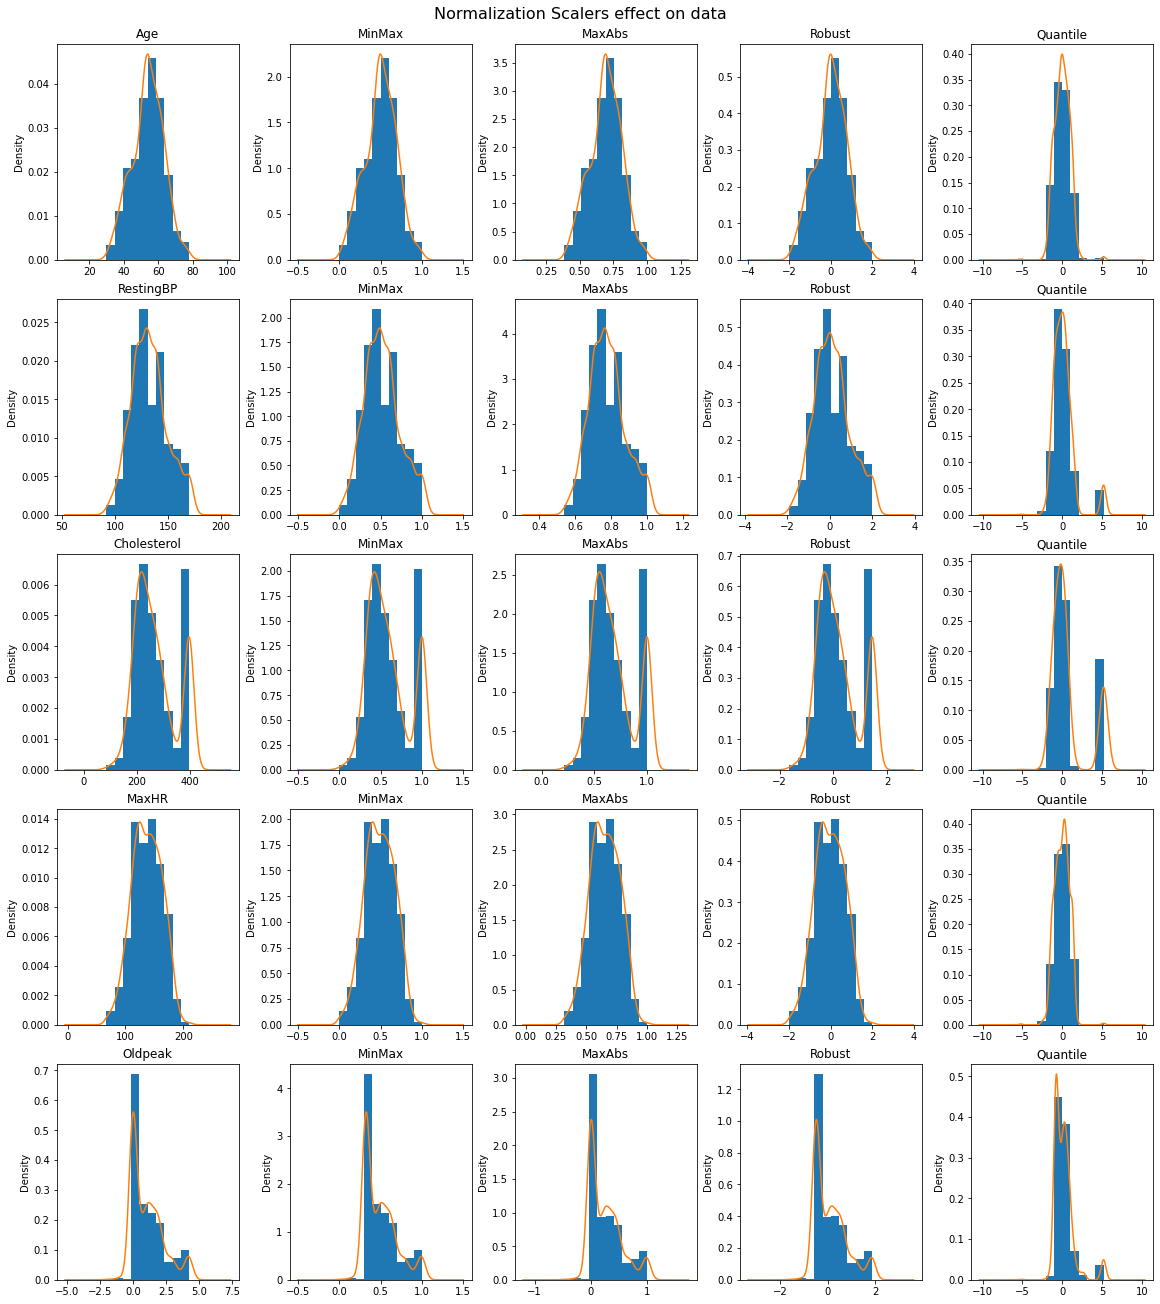

In [15]:
# In this cell, We are plotting the effects of 4 Normalization scalers on data.

# These are the features that we will apply the scaling techniques on.
val_cols_names = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

scaler_names = ['MinMax', 'MaxAbs', 'Robust', 'Quantile']

arr_scalers = [MinMaxScaler(), MaxAbsScaler(), RobustScaler(), QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal')]

plot_histograms_density_for_scalers(df, val_cols_names, 'Normalization Scalers effect on data', arr_scalers, scaler_names)

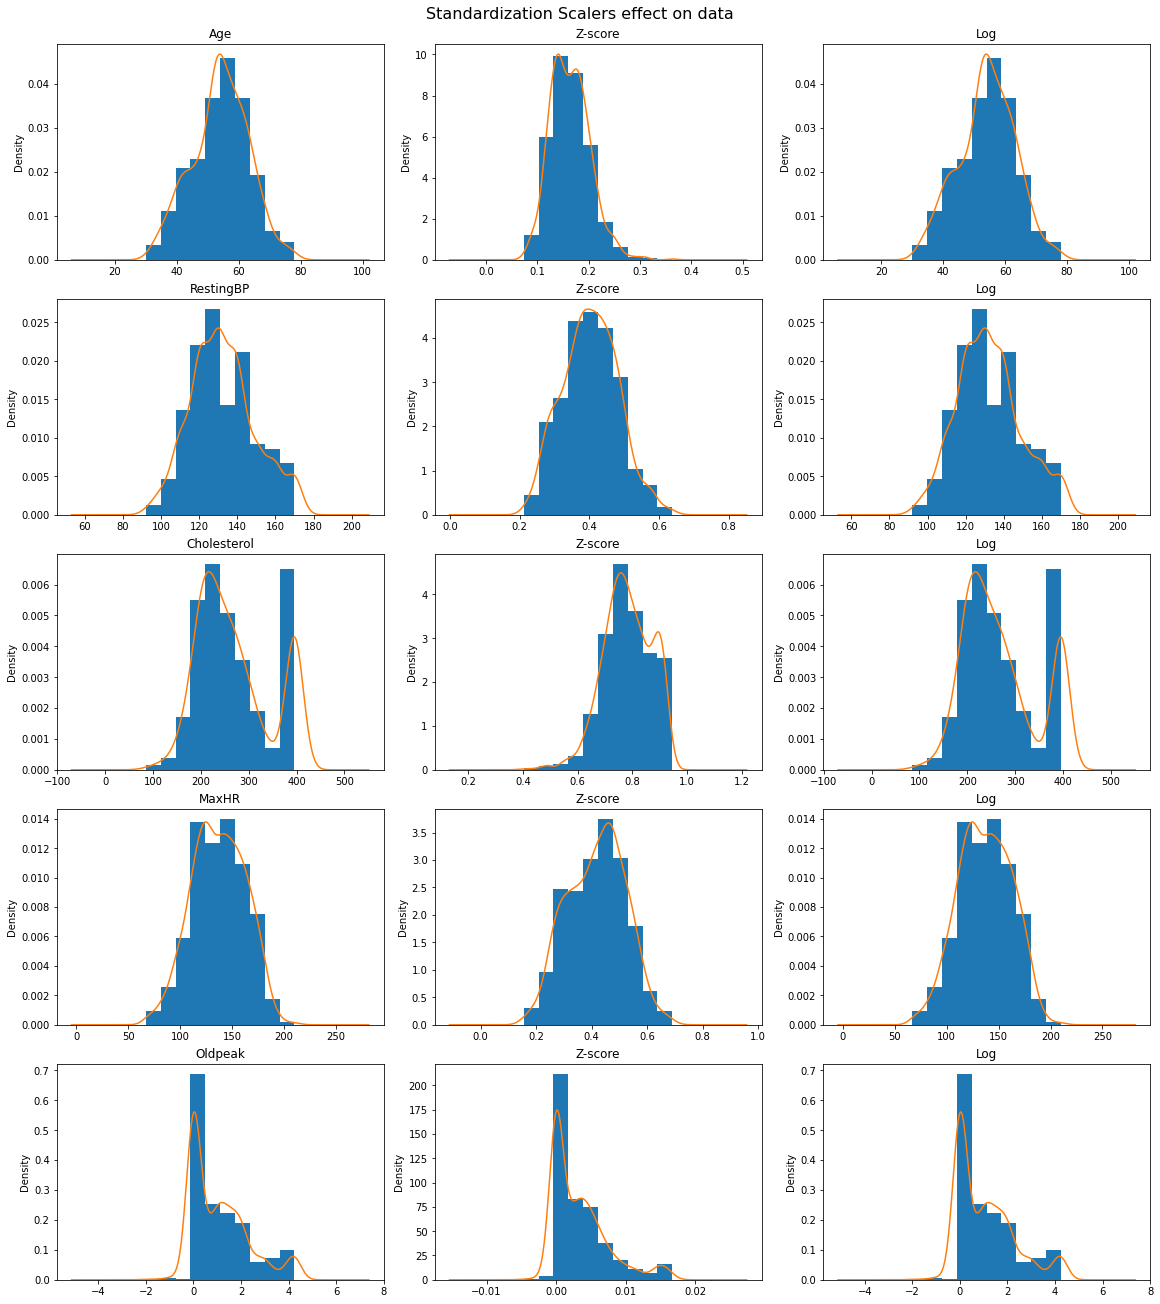

In [16]:
# In this cell, We are plotting the effects of 2 Standardization scalers on data.

scaler_names = ['Z-score', "Log"]

arr_scalers = [Normalizer(), FunctionTransformer()]

plot_histograms_density_for_scalers(df, val_cols_names, 'Standardization Scalers effect on data', arr_scalers, scaler_names)

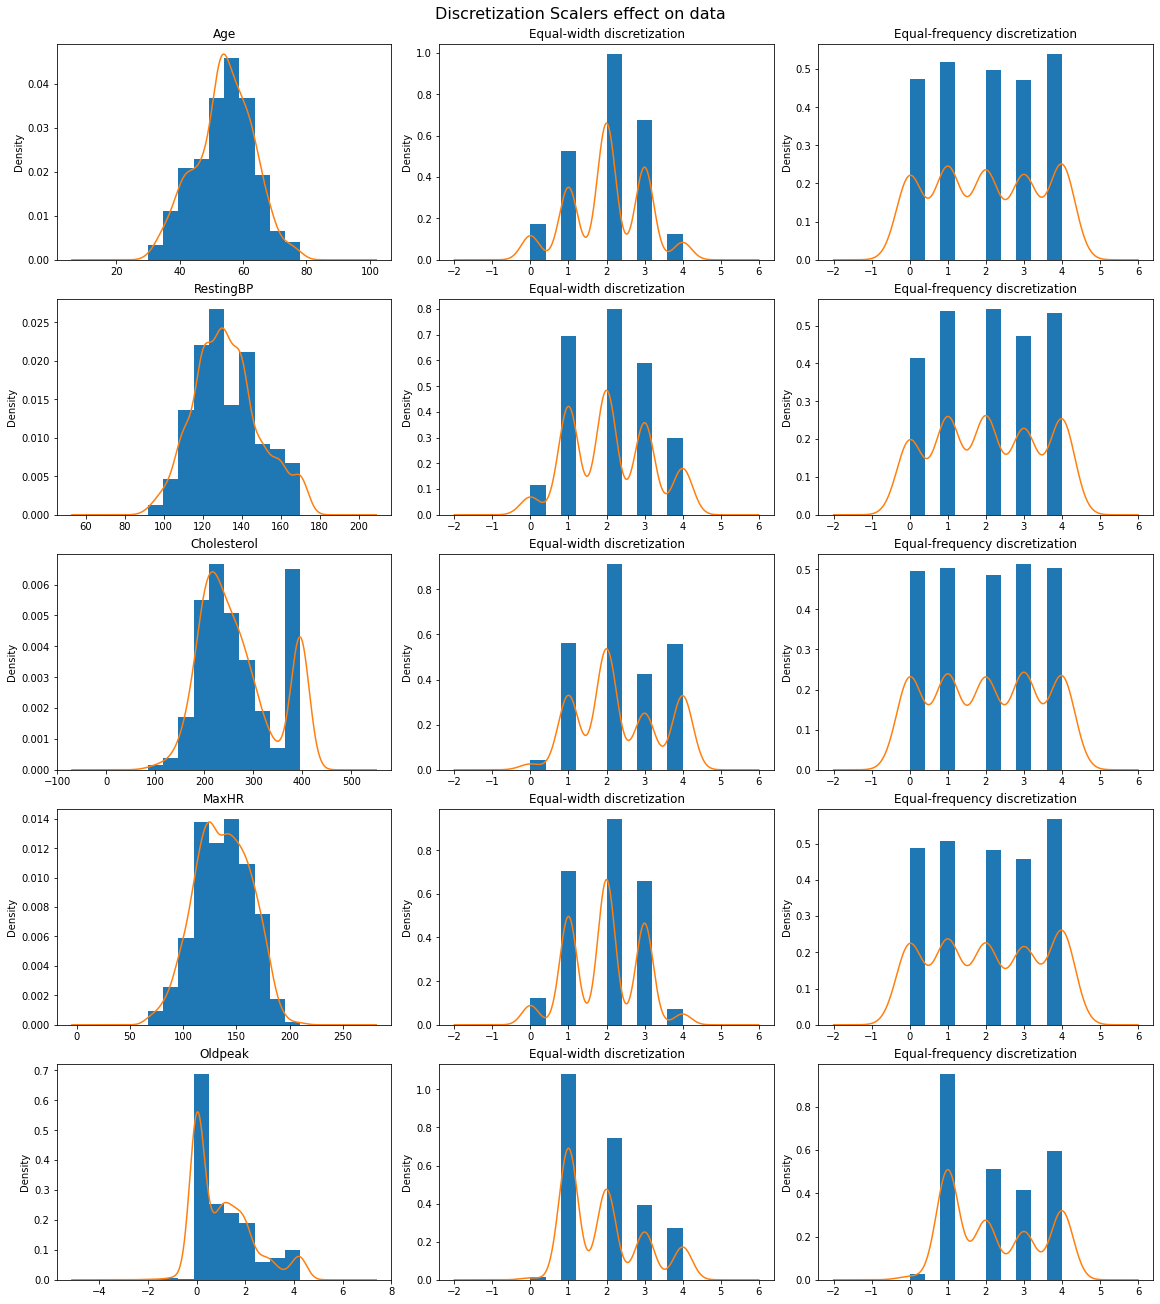

In [17]:
# In this cell, We are plotting the effects of 2 Discretization scalers on data.

scaler_names = ['Equal-width discretization', "Equal-frequency discretization"]

arr_scalers = [KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform'), KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')]

plot_histograms_density_for_scalers(df, val_cols_names, 'Discretization Scalers effect on data', arr_scalers, scaler_names)

In [18]:
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from pandas.plotting import boxplot
def scale_data_Classifier(df, scalers, scaler_names, attribute_name):
  for j in range(len(scalers)):
      df_transformed = scalers[j].fit_transform(df)
      df_transformed = pd.DataFrame(df_transformed, index=df.index, columns=df.columns)

      #Let's start by computing the linear classification model on the data that was scaled
      lin_model = SGDClassifier(loss="squared_error", penalty="l2")
      X = df_transformed.drop([attribute_name], axis=1).to_numpy()
      y = df_transformed[attribute_name].to_numpy()

      #Here we estimate the values for several rounds of cross-validation using Accuracy metric
      cv = RepeatedKFold(n_splits=6, n_repeats=5, random_state=1)
      lin_scores = cross_val_score(lin_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
      dfLinResult = pd.DataFrame(lin_scores)
      print()
      print("Linear model score average using", scaler_names[j] , "Scaling method is:" , dfLinResult.mean().values[0].tolist())
      #Now, let's do the same but with KNN Classifier
      knn_model = KNeighborsClassifier(n_neighbors=6)
      knn_scores = cross_val_score(knn_model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
      dfKNNResult = pd.DataFrame(knn_scores)
      print("KNN model score average using", scaler_names[j] , "Scaling method is:" , dfKNNResult.mean().values[0].tolist())

      dfoutcomes = pd.DataFrame()
      dfoutcomes['Linear Classifier'] = dfLinResult
      dfoutcomes['KNN'] = dfKNNResult
      boxplot = dfoutcomes.boxplot()
      boxplot.set_ylabel('Accuracy')
      title = scaler_names[j] + ' Scaled data'
      plt.suptitle(title)
      plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error
def scale_data_Regression(df, scalers, scaler_names, attribute_name):
  for j in range(len(scalers)):
      df_transformed = scalers[j].fit_transform(df)
      df_transformed = pd.DataFrame(df_transformed, index=df.index, columns=df.columns)

      #Let's start by computing the linear regression model on the data that was scaled
      lin_model = LinearRegression()
      knn_model = KNeighborsRegressor(n_neighbors=6)
      X = df_transformed.drop([attribute_name], axis=1).to_numpy()
      y = df_transformed[attribute_name].to_numpy()

      #Here we estimate the values for several rounds of cross-validation using Accuracy metric
      y_pred = cross_val_predict(lin_model, X, y, cv = 5)
      meanERR = mean_squared_error(y , y_pred)
      print()
      print("Linear Regression mean_squared_error using", scaler_names[j] , "Scaling method is:" , meanERR)
      #Now, let's do the same but with KNN Regression
      y_pred2 = cross_val_predict(knn_model, X, y, cv = 5)
      meanERR = mean_squared_error(y , y_pred2)
      print("KNN Regression mean_squared_error using", scaler_names[j] , "Scaling method is:" , meanERR)

      dfoutcomes = pd.DataFrame()
      dfoutcomes['Linear Regression'] = y_pred
      dfoutcomes['KNN'] = y_pred2
      boxplot = dfoutcomes.boxplot()
      boxplot.set_ylabel('max_error')
      title = scaler_names[j] + ' Scaled data'
      plt.suptitle(title)
      plt.show()

In [20]:
arr_scalers = [MinMaxScaler(), MaxAbsScaler(), RobustScaler(), QuantileTransformer(n_quantiles=10, random_state=0, output_distribution='normal'), Normalizer(), 
              FunctionTransformer(), KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform'), KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')]
scaler_names = ['MinMax', 'MaxAbs', 'Robust', 'Quantile', 'Z-score', "Log", 'Equal-width discretization', "Equal-frequency discretization"]


Linear model score average using MinMax Scaling method is: 0.4943464682649032
KNN model score average using MinMax Scaling method is: 0.805951134380454


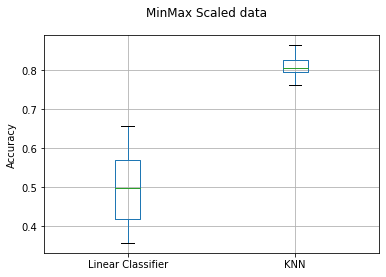


Linear model score average using MaxAbs Scaling method is: 0.5077312390924955
KNN model score average using MaxAbs Scaling method is: 0.799114540277395


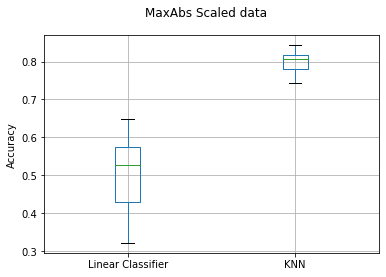


Linear model score average using Robust Scaling method is: 0.7410783503260769
KNN model score average using Robust Scaling method is: 0.832083218517498


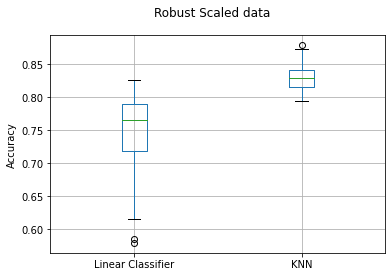


Linear model score average using Quantile Scaling method is: nan
KNN model score average using Quantile Scaling method is: nan


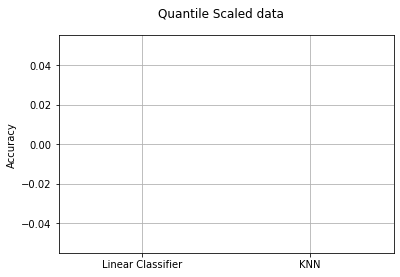


Linear model score average using Z-score Scaling method is: nan
KNN model score average using Z-score Scaling method is: nan


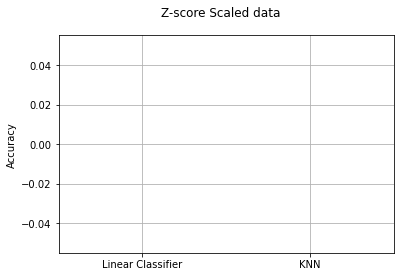


Linear model score average using Log Scaling method is: 0.5009442454303297
KNN model score average using Log Scaling method is: 0.6997354643152386


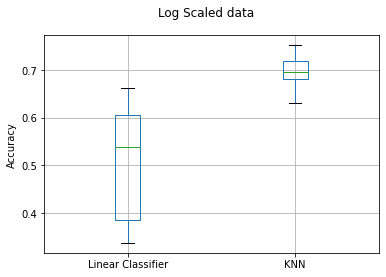


Linear model score average using Equal-width discretization Scaling method is: 0.5155166712593001
KNN model score average using Equal-width discretization Scaling method is: 0.7982382658216222


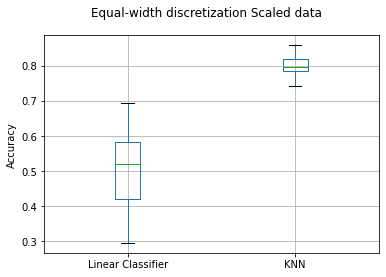


Linear model score average using Equal-frequency discretization Scaling method is: nan
KNN model score average using Equal-frequency discretization Scaling method is: 1.0


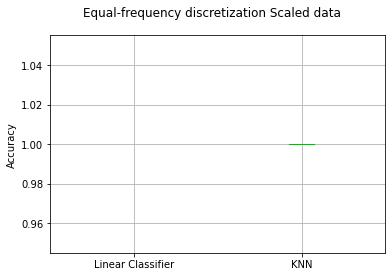

In [21]:
scale_data_Classifier(df, arr_scalers, scaler_names, 'HeartDisease')


Linear model score average using MinMax Scaling method is: 0.5072710572242124
KNN model score average using MinMax Scaling method is: 0.7877211352989804


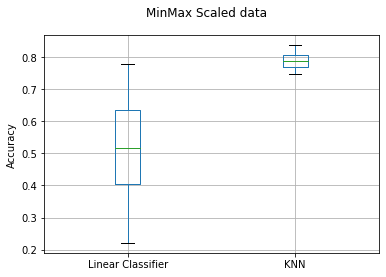


Linear model score average using MaxAbs Scaling method is: 0.538999724441995
KNN model score average using MaxAbs Scaling method is: 0.7824662441443924


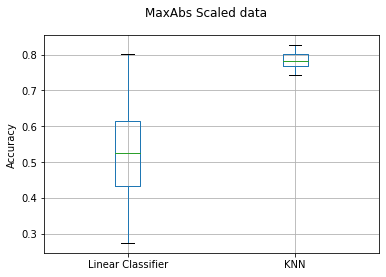


Linear model score average using Robust Scaling method is: 0.7219720767888308
KNN model score average using Robust Scaling method is: 0.7880756865986954


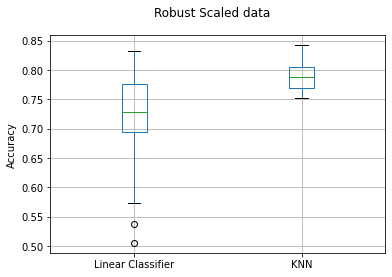


Linear model score average using Quantile Scaling method is: nan
KNN model score average using Quantile Scaling method is: nan


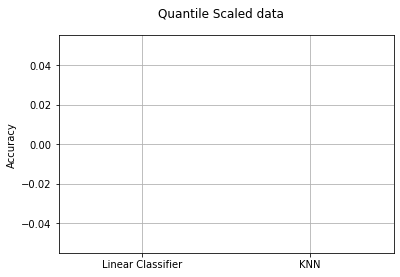


Linear model score average using Z-score Scaling method is: nan
KNN model score average using Z-score Scaling method is: nan


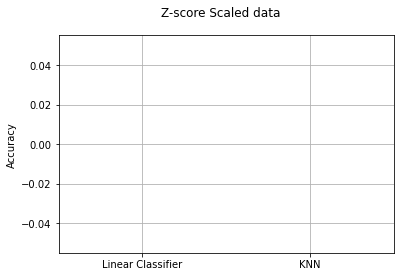


Linear model score average using Log Scaling method is: 0.5338146413153303
KNN model score average using Log Scaling method is: 0.7864912280701754


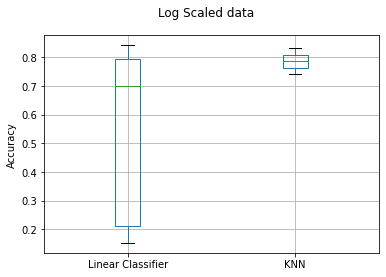


Linear model score average using Equal-width discretization Scaling method is: 0.47246440709102594
KNN model score average using Equal-width discretization Scaling method is: 0.7873776063194636


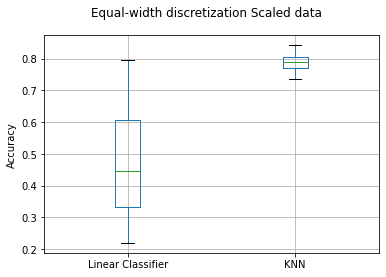


Linear model score average using Equal-frequency discretization Scaling method is: nan
KNN model score average using Equal-frequency discretization Scaling method is: 1.0


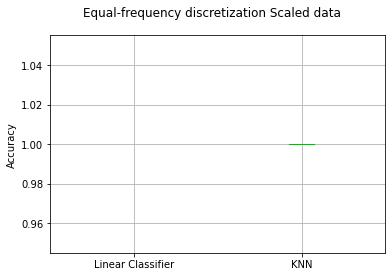

In [22]:
scale_data_Classifier(df, arr_scalers, scaler_names, 'FastingBS')


Linear Regression mean_squared_error using MinMax Scaling method is: 0.04474787171385198
KNN Regression mean_squared_error using MinMax Scaling method is: 0.054006983671133414


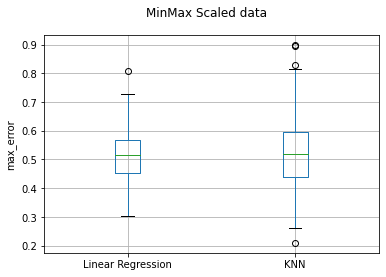


Linear Regression mean_squared_error using MaxAbs Scaling method is: 0.009430954263963797
KNN Regression mean_squared_error using MaxAbs Scaling method is: 0.011115147851513994


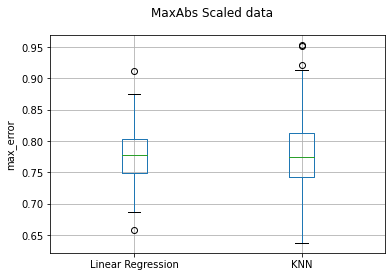


Linear Regression mean_squared_error using Robust Scaling method is: 0.6802300590789883
KNN Regression mean_squared_error using Robust Scaling method is: 0.7936768429253092


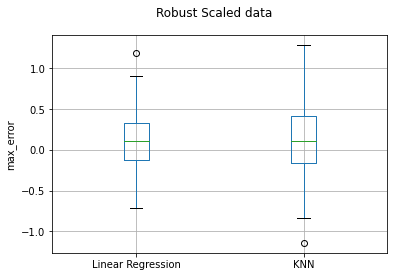


Linear Regression mean_squared_error using Quantile Scaling method is: 1.983505425630752
KNN Regression mean_squared_error using Quantile Scaling method is: 2.2349349274168944


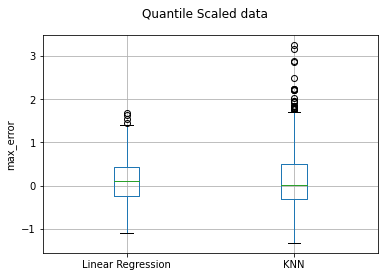


Linear Regression mean_squared_error using Z-score Scaling method is: 0.0007834449850714946
KNN Regression mean_squared_error using Z-score Scaling method is: 0.00036616699576624644


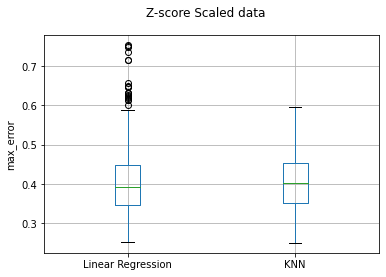


Linear Regression mean_squared_error using Log Scaling method is: 272.1476366665712
KNN Regression mean_squared_error using Log Scaling method is: 334.93650793650795


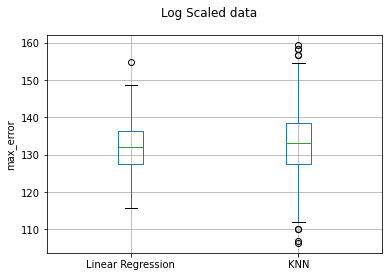


Linear Regression mean_squared_error using Equal-width discretization Scaling method is: 1.1065976665690738
KNN Regression mean_squared_error using Equal-width discretization Scaling method is: 1.2868098159509203


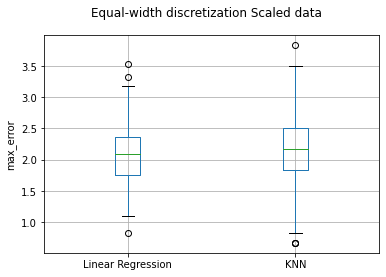


Linear Regression mean_squared_error using Equal-frequency discretization Scaling method is: 1.759302978788726
KNN Regression mean_squared_error using Equal-frequency discretization Scaling method is: 2.1727042555263414


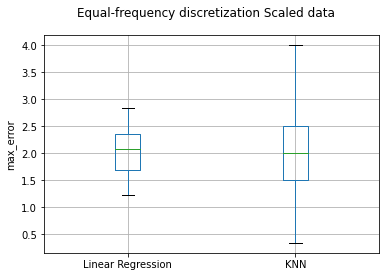

In [23]:
scale_data_Regression(df, arr_scalers, scaler_names, 'RestingBP')


Linear Regression mean_squared_error using MinMax Scaling method is: 0.04455993834041432
KNN Regression mean_squared_error using MinMax Scaling method is: 0.048488408997955014


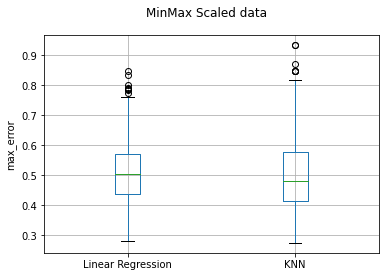


Linear Regression mean_squared_error using MaxAbs Scaling method is: 0.10018242603065856
KNN Regression mean_squared_error using MaxAbs Scaling method is: 0.10407529498025603


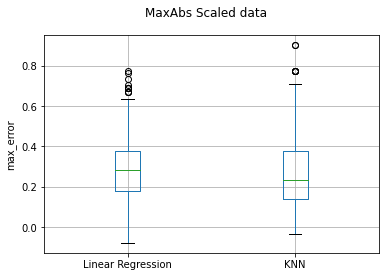


Linear Regression mean_squared_error using Robust Scaling method is: 0.5397374289752924
KNN Regression mean_squared_error using Robust Scaling method is: 0.6207107135944332


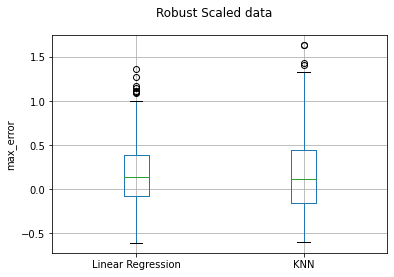


Linear Regression mean_squared_error using Quantile Scaling method is: 1.7578298558710783
KNN Regression mean_squared_error using Quantile Scaling method is: 1.875054687035047


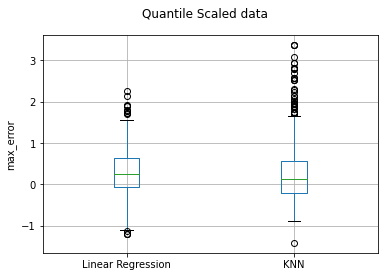


Linear Regression mean_squared_error using Z-score Scaling method is: 1.7048207419195287e-05
KNN Regression mean_squared_error using Z-score Scaling method is: 2.4295112409968056e-05


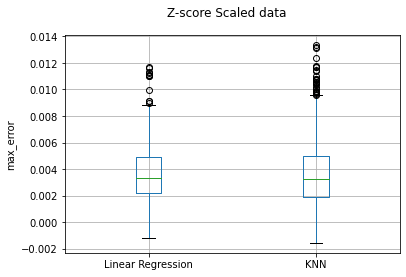


Linear Regression mean_squared_error using Log Scaling method is: 1.7436786751264355
KNN Regression mean_squared_error using Log Scaling method is: 2.481902266530334


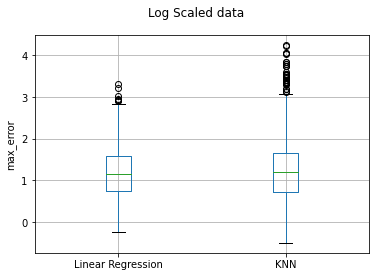


Linear Regression mean_squared_error using Equal-width discretization Scaling method is: 1.1999319011343874
KNN Regression mean_squared_error using Equal-width discretization Scaling method is: 1.292579608530529


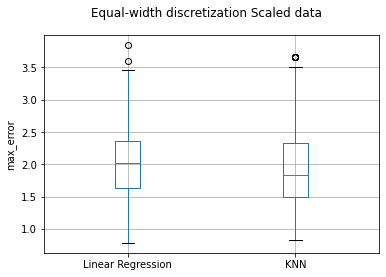


Linear Regression mean_squared_error using Equal-frequency discretization Scaling method is: 2.419703717071854
KNN Regression mean_squared_error using Equal-frequency discretization Scaling method is: 2.763584574934268


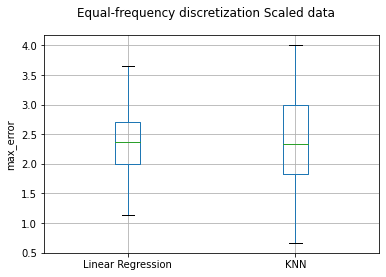

In [24]:
scale_data_Regression(df, arr_scalers, scaler_names, 'Oldpeak')

**Performing the exact same encoding methods on dfCopy (a copy from original dataframe before modifications)**

In [25]:
# Encoding the sex feature using one-hot encoding. Then I added the two generated columns in the dataframe. 
sex_trans = pd.DataFrame(ohe.fit_transform(dfCopy.Sex.values.reshape(-1,1)).toarray())
dfCopy.insert(1, ohe.categories_[0][0], sex_trans[0].astype(int), True )
dfCopy.insert(2, ohe.categories_[0][1], sex_trans[1].astype(int), True )

# Encoding the Chest Pain Type feature using one-hot encoding. Then I added the four generated columns in the dataframe. 
cp_trans = pd.DataFrame(ohe.fit_transform(dfCopy.ChestPainType.values.reshape(-1,1)).toarray())
dfCopy.insert(3, ohe.categories_[0][0], cp_trans[0].astype(int), True )
dfCopy.insert(4, ohe.categories_[0][1], cp_trans[1].astype(int), True )
dfCopy.insert(5, ohe.categories_[0][2], cp_trans[2].astype(int), True )
dfCopy.insert(6, ohe.categories_[0][3], cp_trans[3].astype(int), True )

# Encoding the RestingECG feature using one-hot encoding. Then I added the four generated columns in the dataframe. 
RestingECG_trans = pd.DataFrame(ohe.fit_transform(dfCopy.RestingECG.values.reshape(-1,1)).toarray())
dfCopy.insert(12, ohe.categories_[0][0], RestingECG_trans[0].astype(int), True )
dfCopy.insert(13, ohe.categories_[0][1], RestingECG_trans[1].astype(int), True )
dfCopy.insert(14, ohe.categories_[0][2], RestingECG_trans[2].astype(int), True )

# We implemented ordinal encoder to ExerciseAngina feature using replace
dfCopy = dfCopy.replace({'N': 0, 'Y': 1})

# Encoding the ST_Slope feature using one-hot encoding. Then I added the four generated columns in the dataframe. 
ST_Slope_trans = pd.DataFrame(ohe.fit_transform(dfCopy.ST_Slope.values.reshape(-1,1)).toarray())
dfCopy.insert(19, ohe.categories_[0][0], ST_Slope_trans[0].astype(int), True )
dfCopy.insert(20, ohe.categories_[0][1], ST_Slope_trans[1].astype(int), True )
dfCopy.insert(21, ohe.categories_[0][2], ST_Slope_trans[2].astype(int), True )

# I removed the sex, ChestPainType, RestingECG and ST_Slope columns from the dataframe 
# because they get replaced by the encoded columns. 
dfCopy = dfCopy.drop('Sex', axis=1)
dfCopy = dfCopy.drop('ChestPainType', axis=1)
dfCopy = dfCopy.drop('RestingECG', axis=1)
dfCopy = dfCopy.drop('ST_Slope', axis=1)

dfCopy2 = dfCopy.copy()
dfCopy2.loc[dfCopy2["HeartDisease"].isnull() == True, "HeartDisease"] = HeartDisease_col_mode
dfCopy2.loc[dfCopy2["FastingBS"].isnull() == True, "FastingBS"] = FastingBS_col_mode

**Here, we are producing the attributes that will be used for filling the missing data and replacing the outliers using the decided (Classifier,
Regressor + Data scaling technique)**

In [26]:
oldFastingBS = dfCopy.FastingBS       # Attrinute with Missing data 
oldHeartDisease = dfCopy.HeartDisease # Attrinute with Missing data

oldRestingBP = dfCopy.RestingBP      # Attrinute with Outliers
oldOldpeak = dfCopy.Oldpeak          # Attrinute with Outliers

def PredictAttribute(model, scaler, attributeToPredict, fitDF, predDF):
  fitDF_transformed = scaler.fit_transform(fitDF)
  fitDF_transformed = pd.DataFrame(fitDF_transformed, index=fitDF.index, columns=fitDF.columns)
  
  predDF_transformed = scaler.fit_transform(predDF)
  predDF_transformed = pd.DataFrame(predDF_transformed, index=fitDF.index, columns=fitDF.columns)

  X = fitDF_transformed.drop([attributeToPredict], axis=1)
  y = fitDF_transformed[attributeToPredict].to_numpy()
  model.fit(X , y)
  X_pred = predDF_transformed.drop([attributeToPredict], axis=1)
  y_pred = model.predict(X_pred)
  test_output = y_pred
  return test_output



newFastingBS = PredictAttribute(KNeighborsClassifier(n_neighbors=6), RobustScaler(),'FastingBS', df, dfCopy2)         # Attrinute with Missing data prediction using knn + Robust scaler
newHeartDisease = PredictAttribute(KNeighborsClassifier(n_neighbors=6), KBinsDiscretizer(n_bins=5, encode='ordinal',
                  strategy='uniform'),'HeartDisease', df, dfCopy2)                                                    # Attrinute with Missing data prediction using knn + Equal-width discretization

newRestingBP = PredictAttribute(KNeighborsRegressor(n_neighbors=6), Normalizer(),'RestingBP', df, dfCopy2)            # Attrinute with outliers prediction using knn Regressor + Robust scaler
newOldpeak = PredictAttribute(LinearRegression(), Normalizer(),'Oldpeak', df, dfCopy2)                                # Attrinute with outliers prediction using knn Regressor + Robust scaler

**Replacing outliers and missing data with the data predicted by the models + scaling methods above**

In [27]:
# Here we replace the nan values with the predicted values from the model + scaling predictions
import math
for i in range(len(dfCopy.FastingBS)):
  if math.isnan(dfCopy.FastingBS[i]):
    dfCopy.FastingBS[i] = newFastingBS[i]
  if math.isnan(dfCopy.HeartDisease[i]):
    dfCopy.HeartDisease[i] = newHeartDisease[i]

In [28]:
# Here we replace the outliers with the predicted values from the model + scaling predictions
quartile_1 = np.percentile(dfCopy.RestingBP, 25)
quartile_3 = np.percentile(dfCopy.RestingBP, 75)
IQR = quartile_3 - quartile_1
lower_bound  = quartile_1 - (1.5*IQR)
upper_bound  = quartile_3 + (1.5*IQR)

outlier_sum = 0
for i in range(len(dfCopy.RestingBP)):
    if((dfCopy.RestingBP[i] < lower_bound) | (dfCopy.RestingBP[i] > upper_bound)):
      dfCopy.RestingBP[i] = newRestingBP[i]


quartile_1 = np.percentile(dfCopy.Oldpeak, 25)
quartile_3 = np.percentile(dfCopy.Oldpeak, 75)
IQR = quartile_3 - quartile_1
lower_bound  = quartile_1 - (1.5*IQR)
upper_bound  = quartile_3 + (1.5*IQR)

outlier_sum = 0
for i in range(len(dfCopy.Oldpeak)):
    if((dfCopy.Oldpeak[i] < lower_bound) | (dfCopy.Oldpeak[i] > upper_bound)):
      dfCopy.Oldpeak[i] = newOldpeak[i]

dfCopy

,Age,F,M,ASY,ATA,NAP,TA,RestingBP,Cholesterol,FastingBS,LVH,Normal,ST,MaxHR,ExerciseAngina,Oldpeak,Down,Flat,Up,HeartDisease
0,52,0,1,1,0,0,0,160,197,0.0,0,0,1,82,1,0.007175,0,1,0,1.0
1,52,0,1,1,0,0,0,160,197,0.0,0,1,0,94,1,0.007151,0,1,0,4.0
2,53,0,1,0,1,0,0,120,197,0.0,0,1,0,95,0,0.004906,0,1,0,0.0
3,52,0,1,1,0,0,0,130,198,0.0,0,1,0,110,1,0.007071,0,1,0,1.0
4,52,0,1,0,0,1,0,122,198,0.0,0,1,0,110,1,0.010958,1,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,58,0,1,1,0,0,0,114,318,0.0,0,0,1,140,0,0.005723,1,0,0,1.0
1137,50,0,1,1,0,0,0,140,231,0.0,0,0,1,140,1,0.006130,0,1,0,1.0
1138,55,0,1,1,0,0,0,140,217,0.0,0,1,0,111,1,0.010321,1,0,0,1.0
1139,55,0,1,1,0,0,0,140,217,0.0,0,1,0,111,1,0.010321,1,0,0,1.0


**Doing basic data descriptors on each attribute:**

In [29]:
print("Age:")
print("Age", dfCopy["Age"].describe())

print()
print()
print("Sex:")
print("F", dfCopy["F"].describe())
print("M", dfCopy["M"].describe())

print()
print("ChestPainType")
print("ASY", dfCopy["ASY"].describe())
print("ATA", dfCopy["ATA"].describe())
print("NAP	", dfCopy["NAP"].describe())
print("TA", dfCopy["TA"].describe())

print()
print("RestingBP")
print("RestingBP", dfCopy["RestingBP"].describe())

print()
print("Cholesterol")
print("Cholesterol", dfCopy["Cholesterol"].describe())

print()
print("FastingBS")
print("FastingBS", dfCopy["FastingBS"].describe())

print()
print("RestingECG")
print("LVH", dfCopy["LVH"].describe())
print("Normal", dfCopy["Normal"].describe())
print("ST", dfCopy["ST"].describe())

print()
print("MaxHR")
print("MaxHR", dfCopy["MaxHR"].describe())

print()
print("ExerciseAngina")
print("ExerciseAngina", dfCopy["ExerciseAngina"].describe())

print()
print("Oldpeak")
print("Oldpeak", dfCopy["Oldpeak"].describe())

print()
print("ST_Slope")
print("Down", dfCopy["Down"].describe())
print("Flat", dfCopy["Flat"].describe())
print("Up", dfCopy["Up"].describe())

print()
print("HeartDisease")
print("HeartDisease", dfCopy["HeartDisease"].describe())

Age:
Age count    1141.000000
mean       53.878177
std         9.169939
min        28.000000
25%        48.000000
50%        54.000000
75%        60.000000
max        77.000000
Name: Age, dtype: float64


Sex:
F count    1141.000000
mean        0.206836
std         0.405215
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: F, dtype: float64
M count    1141.000000
mean        0.793164
std         0.405215
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: M, dtype: float64

ChestPainType
ASY count    1141.000000
mean        0.546012
std         0.498097
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: ASY, dtype: float64
ATA count    1141.000000
mean        0.173532
std         0.378873
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: ATA, dtype:

**Above we generated descriptors for all of our data. Here we are going to discuss our findings:**

**We found that the average age for the population in this data-set is 53.8**
**We also found that 20% of the population are Females, and about 80% are Males**


**Another finding is that 54% of people did not suffer from any chest pain type, while the remaining had one of 3 different pain types mentioned above**


**We discovered that the average Cholesterol level is 198.83. We will be discussing this more later with plots**


**We also noticed that 83% of the population in our data had heart disease**

**Lets do some plotting to discover more about the relationship between sex and heart disease as well as the relationship between sex and Cholesterol levels!**

Text(0.5, 1.0, 'HeartDisease Rate By Sex')

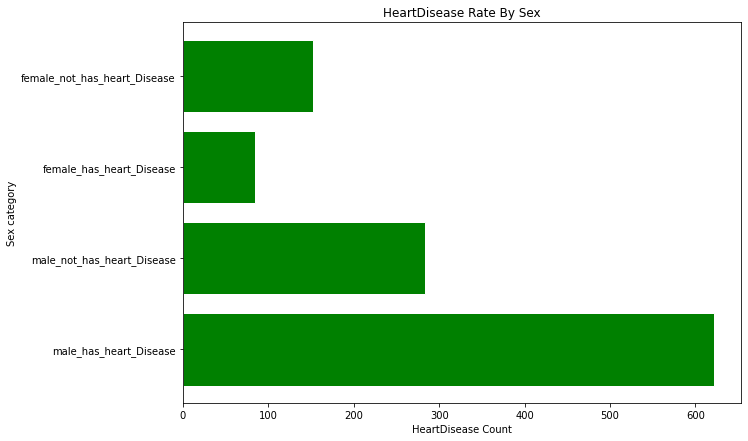

In [30]:
fig, axs = plt.subplots(figsize=(10, 7))

male_has_heart_Disease = dfCopyForPlotting[(dfCopyForPlotting["Sex"] == "M") & (dfCopyForPlotting["HeartDisease"] == 1)].count()["Age"]
male_not_has_heart_Disease = dfCopyForPlotting[(dfCopyForPlotting["Sex"] == "M") & (dfCopyForPlotting["HeartDisease"] == 0)].count()["Age"]
female_has_heart_Disease = dfCopyForPlotting[(dfCopyForPlotting["Sex"] == "F") & (dfCopyForPlotting["HeartDisease"] == 1)].count()["Age"]
female_not_has_heart_Disease = dfCopyForPlotting[(dfCopyForPlotting["Sex"] == "F") & (dfCopyForPlotting["HeartDisease"] == 0)].count()["Age"]
y = [male_has_heart_Disease, male_not_has_heart_Disease, female_has_heart_Disease, female_not_has_heart_Disease]
x = ["male_has_heart_Disease", "male_not_has_heart_Disease", "female_has_heart_Disease", "female_not_has_heart_Disease"]

axs.barh(x, y, edgecolor="white", color='green', linewidth=1)
axs.set(xlabel="HeartDisease Count", ylabel="Sex category")
axs.set_title("HeartDisease Rate By Sex")


**The plot above shows the Heart Disease rate by sex. We can see that males who have heart disease were more than females. That could be becuase there are a lot more males in the dataset than females**

Text(0.5, 1.0, 'Cholesterol level average by sex')

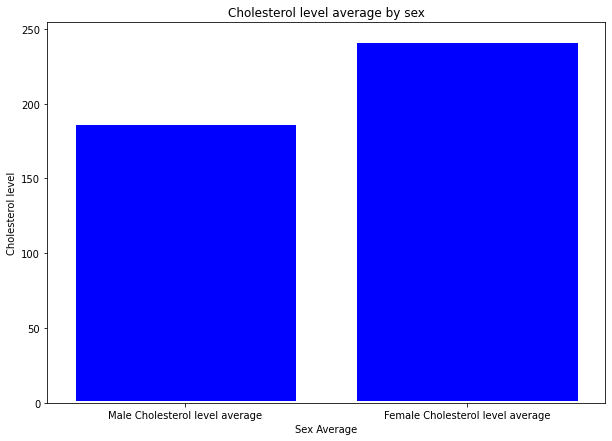

In [31]:
fig, axs = plt.subplots(figsize=(10, 7))
male_chol = 0
female_chol = 0
for i in range(len(dfCopy["Cholesterol"])):
  if(dfCopy["M"][i] == 1):
    male_chol += dfCopy["Cholesterol"][i]
  if(dfCopy["F"][i] == 1):
    female_chol += dfCopy["Cholesterol"][i]

male_count = dfCopy[dfCopy["M"] == 1].count()["Age"]
female_count = dfCopy[dfCopy["F"] == 1].count()["Age"]

male_mean = male_chol/male_count
female_mean = female_chol/female_count

y = [male_mean , female_mean]
x = ["Male Cholesterol level average", "Female Cholesterol level average"]

axs.bar(x, y, edgecolor="white", color='blue', linewidth=5)
axs.set(xlabel="Sex Average", ylabel="Cholesterol level")
axs.set_title("Cholesterol level average by sex")


**Another intersting finding is that  females had higher cholesterol levels than males!**